<center>
    <h2>Hit songs throughout the years and what makes them so popular.<h2>
    <h3>Milen Stanislavov Stanev<h3>
<center>

<center>
    <h3>Introduction:<h3>
    <h6>In this notebook I will try to answer the question - What makes the popular songs popular, if it something to do with the danceability of the song or how loud a song is. Throughout the years many different songs with different parameters have managed to go the top charts position, but there should be a pattern, right? This is the question I'm going to try to answer in this project.<h6>
<center>

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from sklearn.metrics import confusion_matrix
import json

2022-08-25 14:00:51.630927: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-08-25 14:00:51.634051: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-25 14:00:51.634059: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def download_dataset():
    json_object = json.dumps({"username":"milenstanev","key":"056d6edcc8cd5430231b2d4b0aff6cfe"})
    with open("kaggle.json", "w") as outfile:
        outfile.write(json_object)
    !pip install -q kaggle 
    !mkdir train
    !mkdir -p ~/.kaggle
    ! cp kaggle.json ~/.kaggle/
    ! chmod 600 ~/.kaggle/kaggle.json
    !kaggle datasets download -d "theoverman/the-spotify-hit-predictor-dataset"
    !unzip the-spotify-hit-predictor-dataset -d train

In [3]:
download_dataset()
path = r'train'
all_files = glob.glob(os.path.join(path, "*.csv"))

 97%|████████████████████████████████████▉ | 3.00M/3.09M [00:01<00:00, 2.33MB/s]
100%|██████████████████████████████████████| 3.09M/3.09M [00:01<00:00, 2.42MB/s]
Archive:  the-spotify-hit-predictor-dataset.zip
  inflating: train/LICENSE           
  inflating: train/README.txt        
  inflating: train/dataset-of-00s.csv  
  inflating: train/dataset-of-10s.csv  
  inflating: train/dataset-of-60s.csv  
  inflating: train/dataset-of-70s.csv  
  inflating: train/dataset-of-80s.csv  
  inflating: train/dataset-of-90s.csv  


In [4]:
df_from_each_file = (pd.read_csv(f) for f in all_files)

In [5]:
concatenated_df = pd.concat(df_from_each_file, ignore_index=True)
train_df = concatenated_df.copy()

In [6]:
concatenated_df.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target'],
      dtype='object')

In [7]:
concatenated_df = concatenated_df[concatenated_df["target"] == 1]

In [8]:
concatenated_df = concatenated_df.drop(["key","uri"], axis=1)
print("I'm dropping the uri and key from the dataset because i couldn't exactly understand what the key is and the uri is obviously not imporant.")

I'm dropping the uri and key from the dataset because i couldn't exactly understand what the key is and the uri is obviously not imporant.


In [9]:
concatenated_df.rename(columns={"mode" : "modality"}, inplace=True)

In [10]:
concatenated_df.rename(columns={"valence" : "positiveness"}, inplace=True)

In [11]:
concatenated_df.columns

Index(['track', 'artist', 'danceability', 'energy', 'loudness', 'modality',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'positiveness', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target'],
      dtype='object')

In [12]:
concatenated_df.isnull().any()

track               False
artist              False
danceability        False
energy              False
loudness            False
modality            False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
positiveness        False
tempo               False
duration_ms         False
time_signature      False
chorus_hit          False
sections            False
target              False
dtype: bool

In [13]:
concatenated_df.isna().any()

track               False
artist              False
danceability        False
energy              False
loudness            False
modality            False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
positiveness        False
tempo               False
duration_ms         False
time_signature      False
chorus_hit          False
sections            False
target              False
dtype: bool

In [14]:
concatenated_df["track"].value_counts().nlargest(20)

Angel          12
You            12
Hold On        11
Crazy          11
Happy          10
Runaway        10
I Love You     10
Forever        10
Heaven          8
I Want You      8
Smile           8
Stand By Me     8
Stay            8
Tonight         8
I Need You      8
Someday         8
Beautiful       7
Call Me         7
Always          7
Love Me         7
Name: track, dtype: int64

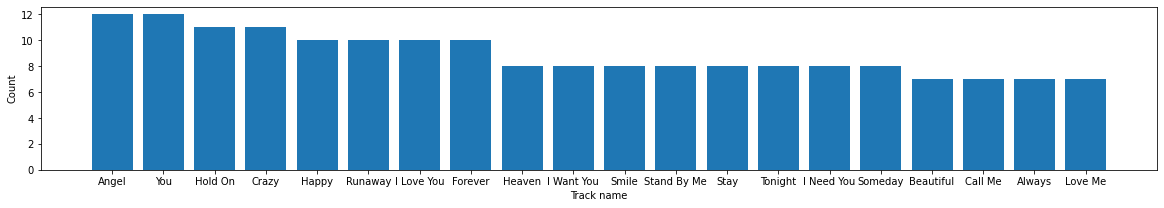

In [15]:
plt.figure(figsize=(20, 3)) 
plt.bar(concatenated_df["track"].value_counts().keys()[:20], concatenated_df["track"].value_counts().nlargest(20))
plt.xlabel("Track name")
plt.ylabel("Count")
plt.show()

In [16]:
artists = concatenated_df["artist"]

In [17]:
artists.value_counts().nlargest(20)

The Beatles           59
Elton John            56
The Rolling Stones    54
Stevie Wonder         53
Madonna               53
Taylor Swift          52
Glee Cast             52
Drake                 51
Aretha Franklin       50
Neil Diamond          50
The Beach Boys        49
Dionne Warwick        46
The Temptations       46
Tim McGraw            45
Kenny Chesney         43
Rod Stewart           42
Chicago               42
Bee Gees              41
Billy Joel            40
Michael Jackson       40
Name: artist, dtype: int64

In [18]:
concatenated_df.drop(["target"], axis=1, inplace=True)

<AxesSubplot:>

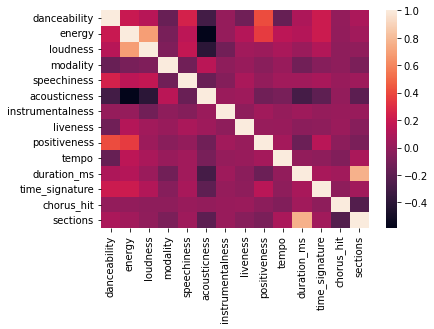

In [19]:
sns.heatmap(concatenated_df.corr())

<center>
    <h4>As we could see we could go through the heatmap and gather useful information about the correlations between different columns. For example positiveness is related with danceability and energy as well. Loudness is related with energy which is obvious I think. As we can see, this is a better looking heatmap than just corr() build in function. There are some columns that are correlated good together and some are not.<h4>
<center>

In [20]:
artists_top20 = concatenated_df["artist"].value_counts().keys()[:20]

In [21]:
songs_top20 = concatenated_df[concatenated_df["artist"].isin(artists_top20)]

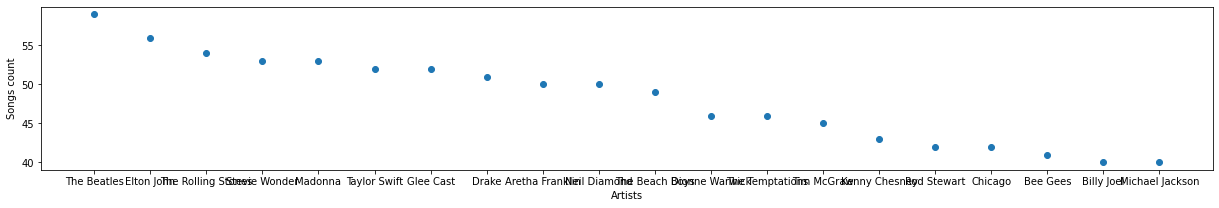

In [22]:
plt.figure(figsize=(21, 3))
plt.xlabel("Artists")
plt.ylabel("Songs count")
plt.scatter(artists_top20, concatenated_df["artist"].value_counts().nlargest(20))
plt.show()

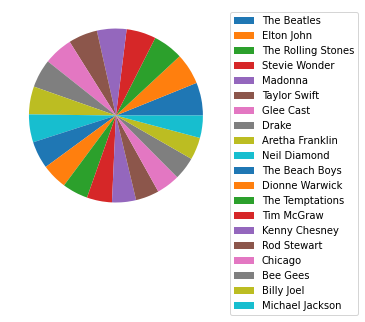

In [23]:
patches, texts = plt.pie(concatenated_df["artist"].value_counts().nlargest(20))
plt.legend(patches, artists_top20, loc='best', bbox_to_anchor=(1, 0.,0.5, 1))
plt.show()

As we can see there this is top 20 of the artists in the dataset. We can see there are pretty famous names in here like The Beatles, Elton John and others. They are pretty evenly separated with variance of only 19 songs.

In [24]:
correlations = concatenated_df.corr().abs()

In [25]:
unstacked = correlations.unstack()

In [26]:
unstacked

danceability  danceability      1.000000
              energy            0.195386
              loudness          0.130171
              modality          0.159562
              speechiness       0.245136
                                  ...   
sections      tempo             0.082331
              duration_ms       0.763029
              time_signature    0.051227
              chorus_hit        0.242518
              sections          1.000000
Length: 196, dtype: float64

In [27]:
unstacked_sorted = unstacked.sort_values(kind="quicksort", ascending=False)

In [28]:
unstacked_sorted

danceability    danceability      1.000000
energy          energy            1.000000
chorus_hit      chorus_hit        1.000000
time_signature  time_signature    1.000000
duration_ms     duration_ms       1.000000
                                    ...   
chorus_hit      acousticness      0.001870
speechiness     positiveness      0.001220
positiveness    speechiness       0.001220
chorus_hit      danceability      0.000674
danceability    chorus_hit        0.000674
Length: 196, dtype: float64

In [29]:
unstacked_sorted = unstacked_sorted[unstacked_sorted != 1]

In [30]:
unstacked_sorted

sections      duration_ms     0.763029
duration_ms   sections        0.763029
loudness      energy          0.686772
energy        loudness        0.686772
acousticness  energy          0.585655
                                ...   
chorus_hit    acousticness    0.001870
speechiness   positiveness    0.001220
positiveness  speechiness     0.001220
chorus_hit    danceability    0.000674
danceability  chorus_hit      0.000674
Length: 182, dtype: float64

In [31]:
top_correlations_column_names = unstacked_sorted.keys()[:5][::2]
top_corrlations_values = unstacked_sorted.values[:5][::2]
#I'm taking the top 3 correlated columns and the top 3 correlated values to plot the afterwards.

In [32]:
top_correlations_column_names, top_corrlations_values

(MultiIndex([(    'sections', 'duration_ms'),
             (    'loudness',      'energy'),
             ('acousticness',      'energy')],
            ),
 array([0.76302864, 0.68677228, 0.5856548 ]))

In [33]:
bottom_correlations_column_names = unstacked_sorted.keys()[-6:][::2]
bottom_correlations_values = unstacked_sorted.values[-6:][::2]
#Same thing here, taking the least correlated columns 

In [34]:
bottom_correlations_column_names, bottom_correlations_values

(MultiIndex([('acousticness',   'chorus_hit'),
             ( 'speechiness', 'positiveness'),
             (  'chorus_hit', 'danceability')],
            ),
 array([0.00187041, 0.00121996, 0.00067429]))

0.763028643178777


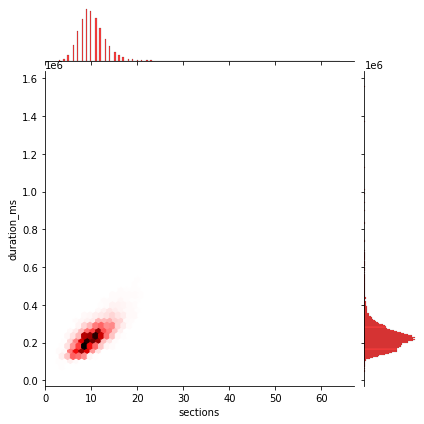

In [35]:
sns.jointplot(x=top_correlations_column_names[0][0], y=top_correlations_column_names[0][1], kind="hex", data=concatenated_df, color="red")
print(top_corrlations_values[0])

I couldnt make the duration_ms to be as i wanted - in minutes, but i converted it into minutes and most of the values in the duration_ms column are close to 3:30 minutes, which is kind of common for songs. They are closely related with section column. This is because sections are tightly coupled with timespan of the song.

0.6867722811722202


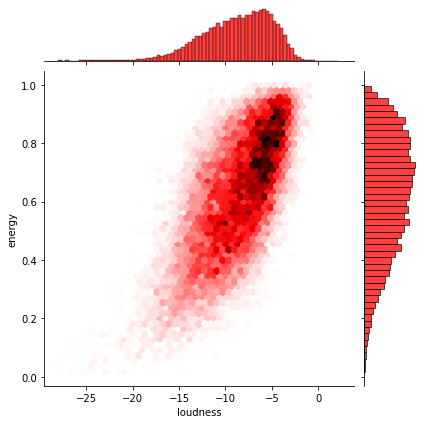

In [36]:
sns.jointplot(x=top_correlations_column_names[1][0], y=top_correlations_column_names[1][1], kind="hex", data=concatenated_df, color="red")
print(top_corrlations_values[1])

So, it seems that most of the energetic songs are loud as well. This does not apply for a number of the songs, but the vast majority of songs that an energetic are loud as well.

0.5856547977608402


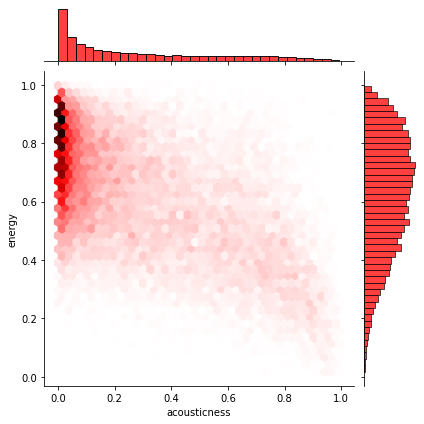

In [37]:
sns.jointplot(x=top_correlations_column_names[2][0], y=top_correlations_column_names[2][1], kind="hex", data=concatenated_df, color="red")
print(top_corrlations_values[2])

ALthough it may seem that they are not exactly related, statistics don't lie, plots lie. Even though the vast majority of the songs are not accoustic at all. That would mean that large portion of the songs are not played with instruments, but digitally.

0.0018704127258441885


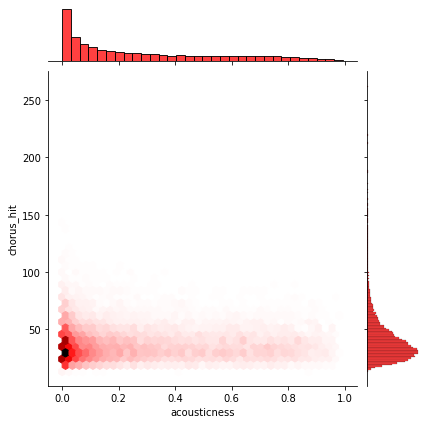

In [38]:
sns.jointplot(x=bottom_correlations_column_names[0][0], y=bottom_correlations_column_names[0][1], kind="hex", data=concatenated_df, color="red")
print(bottom_correlations_values[0])

As we can see, the columns are completely different from one another. That's why this is at the bottom of the correlations list, even though some are correlated 0.001 is no the best correlation.

0.0012199634010138958


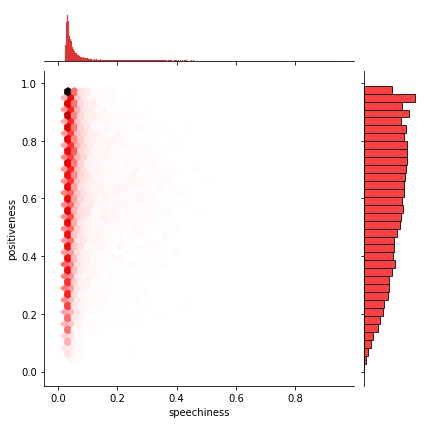

In [39]:
sns.jointplot(x=bottom_correlations_column_names[1][0], y=bottom_correlations_column_names[1][1], kind="hex", data=concatenated_df, color="red")
print(bottom_correlations_values[1])

As we can see, the speechiness is mostly on the left side of the x axis while positiveness is widely spread. Correlation is kind of bad.

0.0006742897131121759


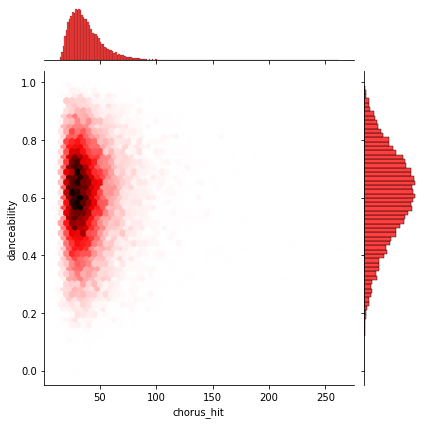

In [40]:
sns.jointplot(x=bottom_correlations_column_names[2][0], y=bottom_correlations_column_names[2][1], kind="hex", data=concatenated_df, color="red")
print(bottom_correlations_values[2])

This is almost zero correlation, although it seems so be highly correlated. It doesn't get worse than that.

I'm going to continue with plotting the distribution of the columns, that way we could tell which columns are more prevalent than the others.

In [41]:
tracks_values = concatenated_df["track"]
artist_values = concatenated_df["artist"]
concatenated_df.drop(["track", "artist"], axis=1, inplace=True)

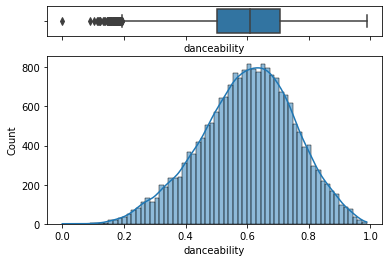

As we can see, the danceability of the hit songs are almost normally distributed with a mean little bit to the right. The mean is 0.6, so above the average songs are meant to be danced to. This means that danceability is rather important for a song to be a hit.



count    20553.000000
mean         0.601237
std          0.151532
min          0.000000
25%          0.502000
50%          0.610000
75%          0.708000
max          0.988000
Name: danceability, dtype: float64


In [42]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
test_plot = sns.boxplot(x=concatenated_df["danceability"], ax=ax_box)
sns.histplot(data=concatenated_df, x="danceability", ax=ax_hist, kde=True)
plt.show()
print("As we can see, the danceability of the hit songs are almost normally distributed with a mean little bit to the right. The mean is 0.6, so above the average songs are meant to be danced to. This means that danceability is rather important for a song to be a hit.")
print("\n\n")
print(concatenated_df["danceability"].describe())

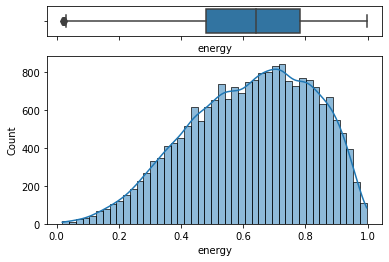

As we can see from the plot, the energy has a mean of .62 which is kinda close to the danceability one, although the standard deviation is different. The energy is more to the bigger size > 50, so that means the more energetical songs are little more that the others with less energy.



count    20553.000000
mean         0.624296
std          0.198501
min          0.018100
25%          0.481000
50%          0.642000
75%          0.784000
max          0.997000
Name: energy, dtype: float64


In [43]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
test_plot = sns.boxplot(x=concatenated_df["energy"], ax=ax_box)
sns.histplot(data=concatenated_df, x="energy", ax=ax_hist, kde=True)
plt.show()
print("As we can see from the plot, the energy has a mean of .62 which is kinda close to the danceability one, although the standard deviation is different. The energy is more to the bigger size > 50, so that means the more energetical songs are little more that the others with less energy.")
print("\n\n")
print(concatenated_df["energy"].describe())

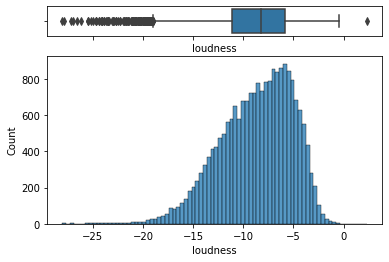

As we can see from this plot and from the boxplot in particular, there are number of outliers which are less than .15 percent from the line of the outliers, but they are not causing any major effect on the plot. Like the previous two plots, this is more to the right side, meaning that most of the songs are loud.



count    20553.000000
mean        -8.702237
std          3.612900
min        -28.030000
25%        -11.124000
50%         -8.273000
75%         -5.881000
max          2.291000
Name: loudness, dtype: float64


In [44]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
test_plot = sns.boxplot(x=concatenated_df["loudness"], ax=ax_box)
sns.histplot(data=concatenated_df, x="loudness", ax=ax_hist)
plt.show()
print("As we can see from this plot and from the boxplot in particular, there are number of outliers which are less than .15 percent from the line of the outliers, but they are not causing any major effect on the plot. Like the previous two plots, this is more to the right side, meaning that most of the songs are loud.")
print("\n\n")
print(concatenated_df["loudness"].describe())

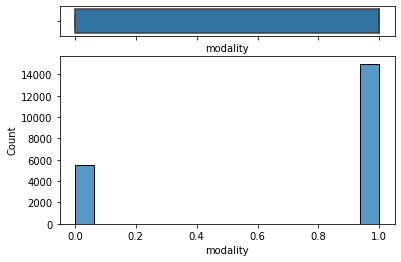

Here the boxplot is useless, because modality is either 1 or 0, we can see that most of the songs' modality is 1 so it is way more prevalent



count    20553.000000
mean         0.730064
std          0.443937
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: modality, dtype: float64


In [45]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
test_plot = sns.boxplot(x=concatenated_df["modality"], ax=ax_box)
sns.histplot(data=concatenated_df, x="modality", ax=ax_hist)
plt.show()
print("Here the boxplot is useless, because modality is either 1 or 0, we can see that most of the songs' modality is 1 so it is way more prevalent")
print("\n\n")
print(concatenated_df["modality"].describe())

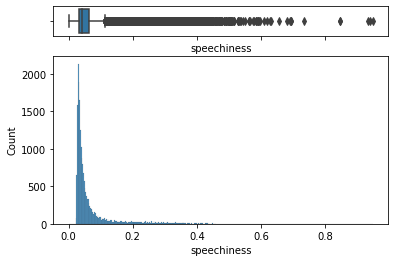

As we can see, most of the songs don't have speech in them.



count    20553.000000
mean         0.069444
std          0.076875
min          0.000000
25%          0.031900
50%          0.040600
75%          0.064600
max          0.950000
Name: speechiness, dtype: float64


In [46]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
test_plot = sns.boxplot(x=concatenated_df["speechiness"], ax=ax_box)
sns.histplot(data=concatenated_df, x="speechiness", ax=ax_hist)
plt.show()
print("As we can see, most of the songs don't have speech in them.")
print("\n\n")
print(concatenated_df["speechiness"].describe())

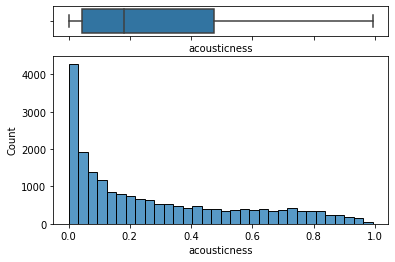

As we can see, the accousticness is mostly on the lower end with mean of 0.17 , so it means that a lot of the songs are digitally made, with computer help, not including instruments.



count    20553.000000
mean         0.280814
std          0.274599
min          0.000002
25%          0.043300
50%          0.181000
75%          0.476000
max          0.994000
Name: acousticness, dtype: float64


In [47]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
test_plot = sns.boxplot(x=concatenated_df["acousticness"], ax=ax_box)
sns.histplot(data=concatenated_df, x="acousticness", ax=ax_hist)
plt.show()
print("As we can see, the accousticness is mostly on the lower end with mean of 0.17 , so it means that a lot of the songs are digitally made, with computer help, not including instruments.")
print("\n\n")
print(concatenated_df["acousticness"].describe())

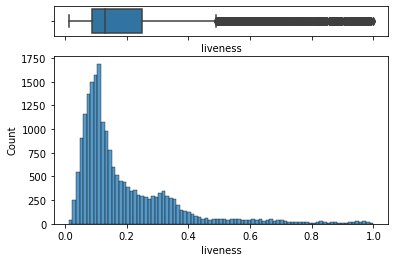

As we can see there are some outliers on the right side, but the predominant values are within .1 and .3 percent. This means that most of the songs are not performed live.



count    20553.000000
mean         0.192637
std          0.163090
min          0.013000
25%          0.088900
50%          0.130000
75%          0.249000
max          0.999000
Name: liveness, dtype: float64


In [48]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
test_plot = sns.boxplot(x=concatenated_df["liveness"], ax=ax_box)
sns.histplot(data=concatenated_df, x="liveness", ax=ax_hist)
plt.show()
print("As we can see there are some outliers on the right side, but the predominant values are within .1 and .3 percent. This means that most of the songs are not performed live.")
print("\n\n")
print(concatenated_df["liveness"].describe())

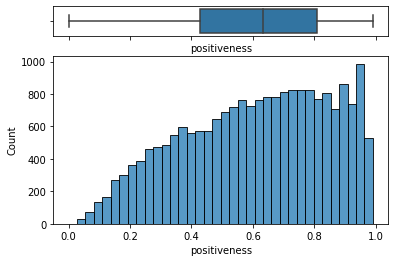

With a mean of over .6 the positiveness is on the high scale for me. It indicates that people love positive songs or narrative. But as we can see, many people still like the sad songs.



count    20553.000000
mean         0.609578
std          0.236259
min          0.000000
25%          0.428000
50%          0.633000
75%          0.808000
max          0.991000
Name: positiveness, dtype: float64


In [49]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
test_plot = sns.boxplot(x=concatenated_df["positiveness"], ax=ax_box)
sns.histplot(data=concatenated_df, x="positiveness", ax=ax_hist)
plt.show()
print("With a mean of over .6 the positiveness is on the high scale for me. It indicates that people love positive songs or narrative. But as we can see, many people still like the sad songs.")
print("\n\n")
print(concatenated_df["positiveness"].describe())

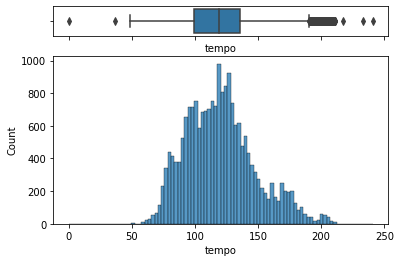

Tempo also knows as Beats per minute is right in the middle. There are some values in the q1 and in q3 but overall is dead in the middle.



count    20553.000000
mean       120.288280
std         27.724797
min          0.000000
25%         99.694000
50%        118.881000
75%        135.938000
max        241.009000
Name: tempo, dtype: float64


In [50]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
test_plot = sns.boxplot(x=concatenated_df["tempo"], ax=ax_box)
sns.histplot(data=concatenated_df, x="tempo", ax=ax_hist)
plt.show()
print("Tempo also knows as Beats per minute is right in the middle. There are some values in the q1 and in q3 but overall is dead in the middle.")
print("\n\n")
print(concatenated_df["tempo"].describe())

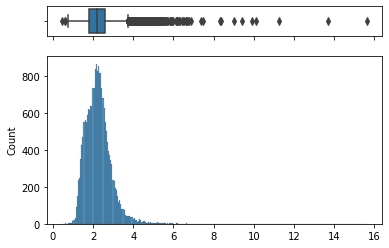

The duration is around 3:30 minutes, and most of them are within one standard deviation from each other which i think i typical, even though there are some outliers on the right side.


In [51]:
transformed_column = [x / 1_000_00 for x in concatenated_df["duration_ms"]]
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
test_plot = sns.boxplot(x=transformed_column, ax=ax_box)
sns.histplot(data=transformed_column, ax=ax_hist)
plt.show()
print("The duration is around 3:30 minutes, and most of them are within one standard deviation from each other which i think i typical, even though there are some outliers on the right side.")

In [52]:
print("I will skip time_signature because i don't fully understand it and will butcher the statistics, but i will use it\
    later in the training of the model")

I will skip time_signature because i don't fully understand it and will butcher the statistics, but i will use it    later in the training of the model


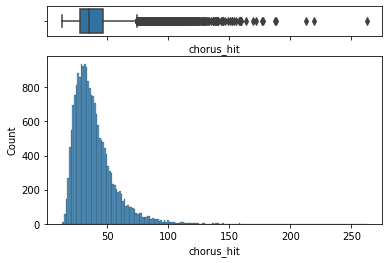

I'm going to leave it here, but use it in the model, most of the chorus is hit early in the song, so that could mean something to the model.



count    20553.000000
mean        39.224034
std         17.217213
min         13.117140
25%         27.592660
50%         35.352590
75%         46.292190
max        262.615400
Name: chorus_hit, dtype: float64


In [53]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
test_plot = sns.boxplot(x=concatenated_df["chorus_hit"], ax=ax_box)
sns.histplot(data=concatenated_df, x="chorus_hit", ax=ax_hist)
plt.show()
print("I'm going to leave it here, but use it in the model, most of the chorus is hit early in the song, so that could mean something to the model.")
print("\n\n")
print(concatenated_df["chorus_hit"].describe())

In [54]:
print("I'm going to do the same with the last column, sections are highly correlated with duration_ms.")

I'm going to do the same with the last column, sections are highly correlated with duration_ms.


<center>
    I'm going to sum up the plots and the describe methods here.
    <h5>* Most of the top songs are danceable aka they could be danced to.</h5>
    <h5>* Most of them are energetic meaning that they feel like fast, loud and noisy.</h5>
    <h5>* Most of them are loud as well.</h5>
    <h5>* Most of them have modality of 1.</h5>
    <h5>* There is no speech in the majority of them.</h5>
    <h5>* Overall accousticness is around 0, meaning that most of them are not played with instruments.</h5>
    <h5>* Most of them are not played live.</h5>
    <h5>* Positiveness is on the larger side.</h5>
    <h5>* Most of the duration of the songs are around 3 minutes.</h5>
<center>

I think the last thing to do is to create the model..so here it is...(make something up here)
First of all i need to prepare the data for the model.

In [55]:
print("I'm taking this dataset which is the original one containing all the values and no dropped columns.\n\
But this will change because i don't need some of the columns, they don't bring any value to the model.")
train_df.head()

I'm taking this dataset which is the original one containing all the values and no dropped columns.
But this will change because i don't need some of the columns, they don't bring any value to the model.


,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Porque?,Reginaldo Rossi,spotify:track:28KC2wl7jDv6Ms1Uc0OMpm,0.669,0.547,1,-9.873,0,0.0576,0.3530,0.000,0.0515,0.730,131.073,141067,4,28.79763,6,0
1,Free Jazz,Maria Teresa Luciani,spotify:track:0zagn8PNnM7pM8pz1gXOAD,0.291,0.300,1,-14.054,0,0.0326,0.9050,0.492,0.1180,0.039,75.619,228224,4,44.10303,9,0
2,Reject of Society,Crass,spotify:track:18eNASEiuAhO2ML5LBIoG4,0.355,0.968,7,-4.687,1,0.1890,0.0504,0.000,0.1300,0.768,181.291,66800,3,25.23004,6,0
3,Yeah !,The Jets,spotify:track:1UlJzHc8E5EprQFJxjSyPL,0.598,0.891,6,-11.904,1,0.0552,0.0183,0.836,0.5790,0.826,144.383,155395,4,55.62066,7,0
4,Gotta Find A Way,The Moments,spotify:track:1Jtlirju8tUXTtvyZJAN5v,0.440,0.376,5,-10.939,1,0.0482,0.3480,0.000,0.0815,0.358,130.438,218333,4,34.90979,12,1


In [56]:
print("The model should be able to differentiate between hit songs and other songs, 0 indicates that the song is not a hit while 1 indicates that the song is hit.")
print("My target column is this:") 
target_col = train_df["target"]

The model should be able to differentiate between hit songs and other songs, 0 indicates that the song is not a hit while 1 indicates that the song is hit.
My target column is this:


In [57]:
print("Cleaning the dataset")
print(f"I need to remove track because songs' name is not important or has very little impact.\n\
*Arist is not valuable either, because a songs' success doesn't depend on artist(at least the first ones)\n\
*Uri - for obvious reasons\n\
*Key - I kind of don't understand it, so I won't be using it.\n\
*Target - this is the target column and it's dependant on the previous columns.")

train_df.drop(["track", "artist", "uri", "key", "target"], axis=1, inplace=True)

Cleaning the dataset
I need to remove track because songs' name is not important or has very little impact.
*Arist is not valuable either, because a songs' success doesn't depend on artist(at least the first ones)
*Uri - for obvious reasons
*Key - I kind of don't understand it, so I won't be using it.
*Target - this is the target column and it's dependant on the previous columns.


In [58]:
print("As you can see, almost all of the columns are between 0 and 1 which is going to help the algorithm to \
    converge faster, but there are some columns which have to be scaled down because neural networks don't \
        generally like too big values")

As you can see, almost all of the columns are between 0 and 1 which is going to help the algorithm to     converge faster, but there are some columns which have to be scaled down because neural networks don't         generally like too big values


In [59]:
train_df["duration_ms"] = [x / 1_000_00 for x in train_df["duration_ms"]]
train_df.rename_axis(columns={"duration_ms":"duration_minutes"}, inplace=True)
print("First, make sure that duration is in minutes.")

First, make sure that duration is in minutes.


In [60]:
train_df.head()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections
0,0.669,0.547,-9.873,0,0.0576,0.3530,0.000,0.0515,0.730,131.073,1.41067,4,28.79763,6
1,0.291,0.300,-14.054,0,0.0326,0.9050,0.492,0.1180,0.039,75.619,2.28224,4,44.10303,9
2,0.355,0.968,-4.687,1,0.1890,0.0504,0.000,0.1300,0.768,181.291,0.66800,3,25.23004,6
3,0.598,0.891,-11.904,1,0.0552,0.0183,0.836,0.5790,0.826,144.383,1.55395,4,55.62066,7
4,0.440,0.376,-10.939,1,0.0482,0.3480,0.000,0.0815,0.358,130.438,2.18333,4,34.90979,12


In [61]:
X = np.array(train_df.iloc[:,:])
print("Next step is to copy the dataset and make it a matrix or list of lists.")

Next step is to copy the dataset and make it a matrix or list of lists.


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, target_col, test_size=0.2)
print(f"We then proceed with splitting the dataset into 4 different smaller datasets.\n\
*X_train and X_test will have the same number of columns, the only difference is that X_train rows will be much large..5x larget to be exact.\n\
*y_train and y_test both have (n,) shapes.")

We then proceed with splitting the dataset into 4 different smaller datasets.
*X_train and X_test will have the same number of columns, the only difference is that X_train rows will be much large..5x larget to be exact.
*y_train and y_test both have (n,) shapes.


In [63]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (32884, 14)
X_test shape: (8222, 14)
y_train shape: (32884,)
y_test shape: (8222,)


In [64]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
print("I still need to scaled all the values in order for the model to converge or to converge faster.\n\
    I'm using StandardScaler but there are multiple scalers across the internet.")

I still need to scaled all the values in order for the model to converge or to converge faster.
    I'm using StandardScaler but there are multiple scalers across the internet.


In [65]:
classifier = Sequential()
print("This is somewhat overgeneralized keras module, but in the future I'm going to use torch.\n\
This Sequential class alows me to keep adding more layers in a sequential manner i.e. one after the other.")

This is somewhat overgeneralized keras module, but in the future I'm going to use torch.
This Sequential class alows me to keep adding more layers in a sequential manner i.e. one after the other.


2022-08-25 14:01:14.123687: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-08-25 14:01:14.123736: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pop-os): /proc/driver/nvidia/version does not exist
2022-08-25 14:01:14.125358: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [66]:
classifier.add(Input(shape=(14,)))
something = Input(shape=(14,))
print(something)
print("\n")
print("This layer is the first layer to the model. It indicates that the data will come with 14 cols, the rows and cols swapped when in tensors.\n\
It will also make the numpy array into tensors array in other words matrix of tensors. This is because the library doesn't really work with numpy or any other arrays, they must be of type tensors.")

KerasTensor(type_spec=TensorSpec(shape=(None, 14), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")


This layer is the first layer to the model. It indicates that the data will come with 14 cols, the rows and cols swapped when in tensors.
It will also make the numpy array into tensors array in other words matrix of tensors. This is because the library doesn't really work with numpy or any other arrays, they must be of type tensors.


In [67]:
classifier.add(Dense(units=200, activation="relu", use_bias=True))
print("Quite a lot of things are going on in here. Firstly i'm adding to the model a dense layer.\n\
The dense layers represent layers N number of neurons. Each individual neuron has its own weight and i have one more parameter specifying that i want bias attached to the neuron as well.\n\
After this i specified that the activation function is relu. It is pretty much the most straightforward activation function for neuron activation(apart from the step function). Essentially the output of the neuron is forward propagated if it is more than 0")

Quite a lot of things are going on in here. Firstly i'm adding to the model a dense layer.
The dense layers represent layers N number of neurons. Each individual neuron has its own weight and i have one more parameter specifying that i want bias attached to the neuron as well.
After this i specified that the activation function is relu. It is pretty much the most straightforward activation function for neuron activation(apart from the step function). Essentially the output of the neuron is forward propagated if it is more than 0


In [68]:
classifier.add(Dropout(0.3))
print("So, this layer applies what's been known as dropout with rate of 0.3,which means that it sets the input to the neuron to 0 (doesn't propagate anything). This is done to prevent overfitting to the data.")

So, this layer applies what's been known as dropout with rate of 0.3,which means that it sets the input to the neuron to 0 (doesn't propagate anything). This is done to prevent overfitting to the data.


In [69]:
classifier.add(Dense(units=150, activation="relu", use_bias=True))
print("Adding one more dense layer to the model. This is exactly what i was talking about the sequential layer. I can add layers till my computers' resources run out and they are one after the other.")

Adding one more dense layer to the model. This is exactly what i was talking about the sequential layer. I can add layers till my computers' resources run out and they are one after the other.


In [70]:
classifier.add(Dense(units=1,activation="sigmoid"))
print("Since our classifier(model) should predict values between 0 and 1, we need the appropriate activation fucntion for this task. I've alredy used relu, but it only returns outputs greater than 0, it's not going to work for this model. I need an activation function that maps the outputs between 0 and 1 (preferably). Sigmoid is exactly like this. It maps the confidence of the model between 0 and 1. And the units are equal to 1 because this is the last layer of the model.")

Since our classifier(model) should predict values between 0 and 1, we need the appropriate activation fucntion for this task. I've alredy used relu, but it only returns outputs greater than 0, it's not going to work for this model. I need an activation function that maps the outputs between 0 and 1 (preferably). Sigmoid is exactly like this. It maps the confidence of the model between 0 and 1. And the units are equal to 1 because this is the last layer of the model.


In [71]:
classifier.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])
print("So, the optimizer helps us to approximate the best fitting line/values for a dataset. Based on the error of the model, the optimizer then goes through the whole network, starting from the last unit. This is called backpropagation(which i started to look into deeply), but in essence the optimizer changes the weights of the neurons depending of how much the output of the model is different from the actual input. For some of the bigger models there is a problem called vanishing gradient, which means that the rate with which the weights are calculated at the very beginning layers of the model, is very close to 0 and that way the weights are almost static at those layers.\n")
print("The loss is simply the difference between actual and predicted values.\n")
print("Metrics is a parameter that will show in the training phase, meaning the accuracy of the predictions.")

So, the optimizer helps us to approximate the best fitting line/values for a dataset. Based on the error of the model, the optimizer then goes through the whole network, starting from the last unit. This is called backpropagation(which i started to look into deeply), but in essence the optimizer changes the weights of the neurons depending of how much the output of the model is different from the actual input. For some of the bigger models there is a problem called vanishing gradient, which means that the rate with which the weights are calculated at the very beginning layers of the model, is very close to 0 and that way the weights are almost static at those layers.

The loss is simply the difference between actual and predicted values.

Metrics is a parameter that will show in the training phase, meaning the accuracy of the predictions.


In [72]:
classifier.fit(X_train, y_train, batch_size=25, epochs=5) 
print("\n\n")
print("So, this is the training phase of the model. We fit the independant variables and the dependant variables. Corresponding to one row of X_train we have one value from y_train. So the issue the model has to resolve is to find correlations between one row of X_train and one value of y_train.")
print("The batch size indicates that the model takes for example 25 rows of data and when every loss is calculated, then the weights are updated, which could help the algorithm run faster and not to take too much resources.")
print("Epochs means that the all the rows from the dataset will go through the model 5 times. If i run the model let's say 100 times, the model will overfit to the training data and will do poorly on the testing data, which is a problem.")

Epoch 1/5
1316/1316 [==============================] - 1s 584us/step - loss: 0.5594 - accuracy: 0.7023
Epoch 2/5
1316/1316 [==============================] - 1s 633us/step - loss: 0.5154 - accuracy: 0.7429
Epoch 3/5
1316/1316 [==============================] - 1s 651us/step - loss: 0.5035 - accuracy: 0.7522
Epoch 4/5
1316/1316 [==============================] - 1s 765us/step - loss: 0.4989 - accuracy: 0.7540
Epoch 5/5
1316/1316 [==============================] - 1s 764us/step - loss: 0.4944 - accuracy: 0.7566



So, this is the training phase of the model. We fit the independant variables and the dependant variables. Corresponding to one row of X_train we have one value from y_train. So the issue the model has to resolve is to find correlations between one row of X_train and one value of y_train.
The batch size indicates that the model takes for example 25 rows of data and when every loss is calculated, then the weights are updated, which could help the algorithm run faster and not to 

In [73]:
y_pred = classifier.predict(X_test)
print("\n")
print("Once the model is trained on the training set, we want to test its predictions on the testing set. So now i'm using the model to predict values on X_train which will result in a list of values between 0 and 1.")

257/257 [==============================] - 0s 394us/step


Once the model is trained on the training set, we want to test its predictions on the testing set. So now i'm using the model to predict values on X_train which will result in a list of values between 0 and 1.


In [74]:
y_pred = y_pred > 0.5
print("Taking the values which are above 0.5 and those below are set to False")

Taking the values which are above 0.5 and those below are set to False


In [75]:
cm = confusion_matrix(y_test, y_pred)
print("I'm going to sum up all our result in one matrix 2x2 which is going to tell us how did the model perform.\n")
print(cm)

I'm going to sum up all our result in one matrix 2x2 which is going to tell us how did the model perform.

[[2842 1219]
 [ 690 3471]]


In [76]:
right = cm[0][0] + cm[1][1]
wrong = cm[0][1] + cm[1][0]
all_of_them = right + wrong

In [77]:
result = right / all_of_them
print(result)

0.7678180491364631


In [78]:
print(f"So the final number on the testing set is {round(result, 2)}.\nI would say that it's pretty good accuracy for such a small model.")

So the final number on the testing set is 0.77.
I would say that it's pretty good accuracy for such a small model.


In [79]:
print("And now we could try to pass our own parameters once the model has learnt all the weights and see whether we've assembled with these parameteres that could actually be a hit.")

And now we could try to pass our own parameters once the model has learnt all the weights and see whether we've assembled with these parameteres that could actually be a hit.


In [80]:
train_df.head(1)

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections
0,0.669,0.547,-9.873,0,0.0576,0.353,0.0,0.0515,0.73,131.073,1.41067,4,28.79763,6


In [81]:
predicted_song = classifier.predict(scaler.transform(np.array([[0.8, 0.6, -8.23, 0, 0.08, 0.2, 0.0, 0.1, 0.6, 120, 3.2, 4, 15, 5]])))

1/1 [==============================] - 0s 18ms/step


In [82]:
predicted_song = predicted_song > 0.5

In [83]:
predicted_song

array([[ True]])

In [84]:
print("With these parameters our song is going to be hit.")

With these parameters our song is going to be hit.


<center>
    This is the end, we've predicted whether a song could be hit with a 77% effectiveness, and as I've stated before, most of the songs are songs that you could dance to or sing to. Most of them are positive and the duration is around 3 minutes. Successfully managed to predict a single song with the model.
<center>    